## Introduction

### Objective: Investigate churn in telecom service plans and build a model to predict if a cutomer will 'leave' or 'stay'. 

Data: The data can be found in the data.csv file in this repository or at https://www.kaggle.com/becksddf/churn-in-telecoms-dataset

There are 20 columbs: 19 atributes and 1 target (churn)

### Scenario

I am a consultant looking to see why customers leave or stay with a telocom service provider. 

### import libraries¶

In [124]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import pandas as pd
import pandas.testing
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import xgboost
import xgboost as xgb
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFE
from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifier, RUSBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score


from sklearn import svm


### Load Data¶

In [4]:
df=pd.read_csv('data.csv')

In [5]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Cleaning and EDA

In [6]:
df.isnull().sum() #check for null data

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [7]:
df.info() # check for problematic data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [8]:
df.select_dtypes(include=object) # get non-qauntified data

,state,phone number,international plan,voice mail plan
0,KS,382-4657,no,yes
1,OH,371-7191,no,yes
2,NJ,358-1921,no,no
3,OH,375-9999,yes,no
4,OK,330-6626,yes,no
...,...,...,...,...
3328,AZ,414-4276,no,yes
3329,WV,370-3271,no,no
3330,RI,328-8230,no,no
3331,CT,364-6381,yes,no


In [9]:
#convert yes/no data to 1's and 0's
df['international plan'].replace({'no': 0, 'yes': 1},inplace=True)
df['voice mail plan'].replace({'no': 0, 'yes': 1},inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   int64  
 5   voice mail plan         3333 non-null   int64  
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [10]:
# drop phone number. A person's phone number should not affect sales outcome 
df=df.drop('phone number',axis=1) 
df.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

In [11]:
df.select_dtypes(include=object) #check for remaining non int/float data (convert state data to numbers)

,state
0,KS
1,OH
2,NJ
3,OH
4,OK
...,...
3328,AZ
3329,WV
3330,RI
3331,CT


In [12]:
df.info() #check for remaining non int/float  (convert churn data to numbers)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   int64  
 4   voice mail plan         3333 non-null   int64  
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

In [13]:
# make state data dummies
state_dummies=pd.get_dummies(df['state'], prefix='state_cat', drop_first=True)

#join with dataframe
df2= pd.concat([df,state_dummies],axis=1)

#drop original state column
df2=df2.drop('state',axis=1)
df2.columns


Index(['account length', 'area code', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn', 'state_cat_AL',
       'state_cat_AR', 'state_cat_AZ', 'state_cat_CA', 'state_cat_CO',
       'state_cat_CT', 'state_cat_DC', 'state_cat_DE', 'state_cat_FL',
       'state_cat_GA', 'state_cat_HI', 'state_cat_IA', 'state_cat_ID',
       'state_cat_IL', 'state_cat_IN', 'state_cat_KS', 'state_cat_KY',
       'state_cat_LA', 'state_cat_MA', 'state_cat_MD', 'state_cat_ME',
       'state_cat_MI', 'state_cat_MN', 'state_cat_MO', 'state_cat_MS',
       'state_cat_MT', 'state_cat_NC', 'state_cat_ND', 'state_cat_NE',
       'state_cat_NH', 'state_cat_NJ', 'state_cat_NM', 'state_ca

In [14]:
# convert churn data to 1/0
df2['churn'] = df2['churn'].astype(int)

df2.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,state_cat_SD,state_cat_TN,state_cat_TX,state_cat_UT,state_cat_VA,state_cat_VT,state_cat_WA,state_cat_WI,state_cat_WV,state_cat_WY
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,0,0,0,0,0,0,0,0,0,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,0,0,0,0,0,0,0,0,0,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,...,0,0,0,0,0,0,0,0,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,...,0,0,0,0,0,0,0,0,0,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df2.columns

Index(['account length', 'area code', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn', 'state_cat_AL',
       'state_cat_AR', 'state_cat_AZ', 'state_cat_CA', 'state_cat_CO',
       'state_cat_CT', 'state_cat_DC', 'state_cat_DE', 'state_cat_FL',
       'state_cat_GA', 'state_cat_HI', 'state_cat_IA', 'state_cat_ID',
       'state_cat_IL', 'state_cat_IN', 'state_cat_KS', 'state_cat_KY',
       'state_cat_LA', 'state_cat_MA', 'state_cat_MD', 'state_cat_ME',
       'state_cat_MI', 'state_cat_MN', 'state_cat_MO', 'state_cat_MS',
       'state_cat_MT', 'state_cat_NC', 'state_cat_ND', 'state_cat_NE',
       'state_cat_NH', 'state_cat_NJ', 'state_cat_NM', 'state_ca

In [16]:
# make area code data dummes (area codes are not quantities)
area_dummies=pd.get_dummies(df['area code'], prefix='areaCode', drop_first=True)

df2= pd.concat([df2,area_dummies],axis=1)

df2=df2.drop('area code',axis=1)
df2.columns

Index(['account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn', 'state_cat_AL',
       'state_cat_AR', 'state_cat_AZ', 'state_cat_CA', 'state_cat_CO',
       'state_cat_CT', 'state_cat_DC', 'state_cat_DE', 'state_cat_FL',
       'state_cat_GA', 'state_cat_HI', 'state_cat_IA', 'state_cat_ID',
       'state_cat_IL', 'state_cat_IN', 'state_cat_KS', 'state_cat_KY',
       'state_cat_LA', 'state_cat_MA', 'state_cat_MD', 'state_cat_ME',
       'state_cat_MI', 'state_cat_MN', 'state_cat_MO', 'state_cat_MS',
       'state_cat_MT', 'state_cat_NC', 'state_cat_ND', 'state_cat_NE',
       'state_cat_NH', 'state_cat_NJ', 'state_cat_NM', 'state_cat_NV',
      

In [17]:
df2.info() #double check data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 70 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   international plan      3333 non-null   int64  
 2   voice mail plan         3333 non-null   int64  
 3   number vmail messages   3333 non-null   int64  
 4   total day minutes       3333 non-null   float64
 5   total day calls         3333 non-null   int64  
 6   total day charge        3333 non-null   float64
 7   total eve minutes       3333 non-null   float64
 8   total eve calls         3333 non-null   int64  
 9   total eve charge        3333 non-null   float64
 10  total night minutes     3333 non-null   float64
 11  total night calls       3333 non-null   int64  
 12  total night charge      3333 non-null   float64
 13  total intl minutes      3333 non-null   float64
 14  total intl calls        3333 non-null   

In [18]:
df2['churn'].describe() # mean close to zero, far more False resulsts, or customers staying

count    3333.000000
mean        0.144914
std         0.352067
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: churn, dtype: float64

In [121]:
df2.describe() #check for outliers/variance in data


,account length,international plan,voice mail plan,total day calls,total day charge,total eve minutes,total eve calls,total night minutes,total night calls,total intl calls,...,state_cat_TX,state_cat_UT,state_cat_VA,state_cat_VT,state_cat_WA,state_cat_WI,state_cat_WV,state_cat_WY,areaCode_415,areaCode_510
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.096910,0.276628,100.435644,30.562307,200.980348,100.114311,200.872037,100.107711,4.479448,...,0.021602,0.021602,0.023102,0.021902,0.019802,0.023402,0.031803,0.023102,0.496550,0.252025
std,39.822106,0.295879,0.447398,20.069084,9.259435,50.713844,19.922625,50.573847,19.568609,2.461214,...,0.145402,0.145402,0.150251,0.146386,0.139340,0.151200,0.175502,0.150251,0.500063,0.434241
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,0.000000,87.000000,24.430000,166.600000,87.000000,167.000000,87.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,0.000000,101.000000,30.500000,201.400000,100.000000,201.200000,100.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,127.000000,0.000000,1.000000,114.000000,36.790000,235.300000,114.000000,235.300000,113.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,243.000000,1.000000,1.000000,165.000000,59.640000,363.700000,170.000000,395.000000,175.000000,20.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
#calculate Coefficient of Variation
pd.DataFrame(df.std()/df.mean().round(decimals=2)).sort_values(0,) 
#data appears to lack serious outliers

,0
area code,0.096920
total night calls,0.195471
total eve calls,0.199007
total day calls,0.199812
total night charge,0.251756
total night minutes,0.251774
total eve minutes,0.252333
total eve charge,0.252381
total intl minutes,0.272641
total intl charge,0.273106


In [21]:
# test for colleations in the variables
test=df2.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns in a new column named "pairs"
test['pairs'] = list(zip(test.level_0, test.level_1))

# set index to pairs
test.set_index(['pairs'], inplace = True)

#drop level columns
test.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
test.columns = ['cc']

# drop duplicates.
test.drop_duplicates(inplace=True)

#correlated variables
temp=test[(test.cc>.75) & (test.cc <1)]
temp

,cc
pairs,
"(total day minutes, total day charge)",1.000000
"(total eve minutes, total eve charge)",1.000000
"(total night charge, total night minutes)",0.999999
"(total intl minutes, total intl charge)",0.999993
"(voice mail plan, number vmail messages)",0.956927


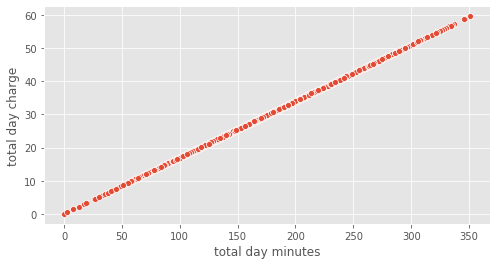

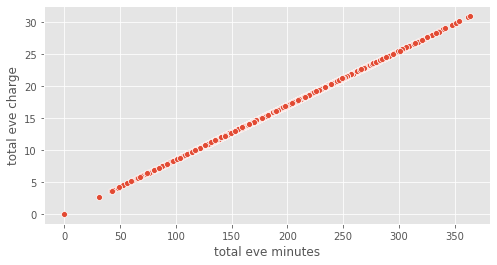

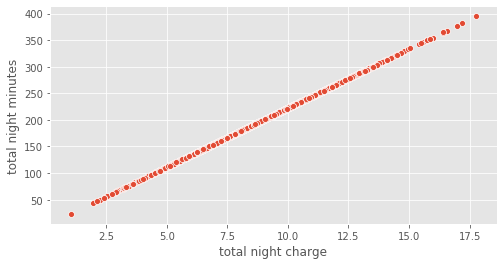

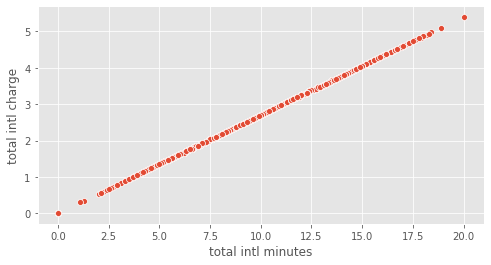

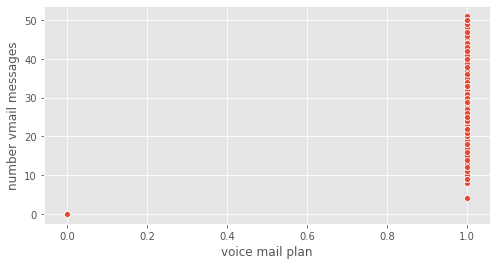

In [22]:
# visualize/check correlations
for i in temp.index:
    fig, ax = plt.subplots(figsize=(8,4))
    sns.scatterplot(df2[i[0]],df2[i[1]])





The above pairs are nearly perfectly correlated

In [23]:
#drop one coluumb from each pair
df2=df2.drop(columns=['total day minutes',
                  'total eve charge',
                  'total night charge',
                  'total intl minutes',
                  'number vmail messages'], axis=1)


In [24]:
df2.columns

Index(['account length', 'international plan', 'voice mail plan',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total night minutes', 'total night calls',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn', 'state_cat_AL', 'state_cat_AR', 'state_cat_AZ', 'state_cat_CA',
       'state_cat_CO', 'state_cat_CT', 'state_cat_DC', 'state_cat_DE',
       'state_cat_FL', 'state_cat_GA', 'state_cat_HI', 'state_cat_IA',
       'state_cat_ID', 'state_cat_IL', 'state_cat_IN', 'state_cat_KS',
       'state_cat_KY', 'state_cat_LA', 'state_cat_MA', 'state_cat_MD',
       'state_cat_ME', 'state_cat_MI', 'state_cat_MN', 'state_cat_MO',
       'state_cat_MS', 'state_cat_MT', 'state_cat_NC', 'state_cat_ND',
       'state_cat_NE', 'state_cat_NH', 'state_cat_NJ', 'state_cat_NM',
       'state_cat_NV', 'state_cat_NY', 'state_cat_OH', 'state_cat_OK',
       'state_cat_OR', 'state_cat_PA', 'state_cat_RI', 'state_cat_SC',
    

In [122]:
df2.corr()['churn'].sort_values(ascending=False) # check for correlations with the target


churn                     1.000000
international plan        0.259852
customer service calls    0.208750
total day charge          0.205151
total eve minutes         0.092796
                            ...   
state_cat_HI             -0.031890
state_cat_AZ             -0.032759
state_cat_VA             -0.034940
total intl calls         -0.052844
voice mail plan          -0.102148
Name: churn, Length: 65, dtype: float64

Most variables are not very correlated with Churn

## Initial Modeling:

In [26]:
#dataframe of model results
res=pd.DataFrame()
res

""


In [27]:
#Split features and target
X = df2.drop(columns=['churn'], axis=1)
y = df2['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=123)

#Scale the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# smote the data (most of the churn data is false)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=123)
X_train_smoted, y_train_smoted = sm.fit_sample(X_train, y_train)

In [123]:
# model builder
def eval_m(model,tittle): 
    results= pd.Series(name=tittle) #series to store results
    model.fit(X_train_smoted, y_train_smoted) #fit data to model

    # add trainding data to series
    training_p=model.predict(X_train_smoted)
    results['precision_train'] = precision_score(y_train_smoted,training_p)
    results['recall_train'] = recall_score(y_train_smoted,training_p)
    results['acc_train'] = accuracy_score(y_train_smoted,training_p)
    results['F1_train'] = f1_score(y_train_smoted,training_p)

    # add testing data to series    
    testing_p=model.predict(X_test)
    results['precision_test'] = precision_score(y_test,testing_p)
    results['recall_test'] = recall_score(y_test,testing_p)
    results['acc_test'] = accuracy_score(y_test,testing_p)
    results['F1_test'] = f1_score(y_test,testing_p)
    
    return results


In [29]:
res=res.append(eval_m(KNeighborsClassifier(n_neighbors=5),'KNN')) #add KNN to table

/Users/sawyershader-seave/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
res=res.append(eval_m(DecisionTreeClassifier(random_state=123),'decision tree')) #add Decision tree to table

/Users/sawyershader-seave/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
res=res.append(eval_m(BaggingClassifier(DecisionTreeClassifier(random_state=123)),'Bagging Tree')) #add bagging tree to model
              

/Users/sawyershader-seave/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
res=res.append(eval_m(RandomForestClassifier(max_depth= 5,random_state=123),'Random Forest'))#add random forest to table


/Users/sawyershader-seave/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/sawyershader-seave/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [33]:
res=res.append(eval_m(AdaBoostClassifier(random_state=123),'AdaBoost')) #add ada Boost to table



/Users/sawyershader-seave/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
res=res.append(eval_m(GradientBoostingClassifier(random_state=123),'GradientBoost'))#add Gradieant boost to table


/Users/sawyershader-seave/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
res=res.append(eval_m(xgb.XGBClassifier(),'XGBoost'))#add Gradieant boost to table

/Users/sawyershader-seave/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
res=res.append(eval_m(svm.SVC(),'SVM')) #add svm to table

/Users/sawyershader-seave/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/sawyershader-seave/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [37]:
# add Multi nomial bayes to table
res=res.append(eval_m(MultinomialNB(),'MNB'))

/Users/sawyershader-seave/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
# add logistic regression to table
res=res.append(eval_m(LogisticRegression(),'Log_Reg'))


/Users/sawyershader-seave/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/sawyershader-seave/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [39]:
#model results
res

,F1_test,F1_train,acc_test,acc_train,precision_test,precision_train,recall_test,recall_train
KNN,0.344828,0.935344,0.743628,0.931299,0.271084,0.883340,0.473684,0.993854
decision tree,0.682243,1.000000,0.898051,1.000000,0.613445,1.000000,0.768421,1.000000
Bagging Trees,0.720812,0.996261,0.917541,0.996269,0.696078,0.998237,0.747368,0.994293
Random Forest,0.583732,0.858519,0.869565,0.864574,0.535088,0.898704,0.642105,0.821773
AdaBoost,0.601942,0.894040,0.877061,0.894644,0.558559,0.899201,0.652632,0.888938
GradientBoost,0.761421,0.959328,0.929535,0.959614,0.735294,0.966162,0.789474,0.952590
XGBoost,0.740000,0.957216,0.922039,0.957638,0.704762,0.966861,0.778947,0.947761
SVM,0.504854,0.790638,0.770615,0.785996,0.364486,0.773855,0.821053,0.808165
MNB,0.379603,0.672605,0.671664,0.669227,0.259690,0.665806,0.705263,0.679543
Log_Reg,0.511628,0.787511,0.779610,0.784899,0.373786,0.778063,0.810526,0.797191


In [40]:
#Model Results transposed
tr_res=res.transpose()
tr_res

,KNN,decision tree,Bagging Trees,Random Forest,AdaBoost,GradientBoost,XGBoost,SVM,MNB,Log_Reg
F1_test,0.344828,0.682243,0.720812,0.583732,0.601942,0.761421,0.740000,0.504854,0.379603,0.511628
F1_train,0.935344,1.000000,0.996261,0.858519,0.894040,0.959328,0.957216,0.790638,0.672605,0.787511
acc_test,0.743628,0.898051,0.917541,0.869565,0.877061,0.929535,0.922039,0.770615,0.671664,0.779610
acc_train,0.931299,1.000000,0.996269,0.864574,0.894644,0.959614,0.957638,0.785996,0.669227,0.784899
precision_test,0.271084,0.613445,0.696078,0.535088,0.558559,0.735294,0.704762,0.364486,0.259690,0.373786
precision_train,0.883340,1.000000,0.998237,0.898704,0.899201,0.966162,0.966861,0.773855,0.665806,0.778063
recall_test,0.473684,0.768421,0.747368,0.642105,0.652632,0.789474,0.778947,0.821053,0.705263,0.810526
recall_train,0.993854,1.000000,0.994293,0.821773,0.888938,0.952590,0.947761,0.808165,0.679543,0.797191


In [42]:
#create sepperate train and test tables
test_l=[]
for i in res.columns:
    if 'test' in i:
        test_l.append(i)
train_l=[]
for i in res.columns:
    if 'train' in i:
        train_l.append(i)


In [43]:
tr_res.loc[train_l] #train results

,KNN,decision tree,Bagging Trees,Random Forest,AdaBoost,GradientBoost,XGBoost,SVM,MNB,Log_Reg
F1_train,0.935344,1.0,0.996261,0.858519,0.894040,0.959328,0.957216,0.790638,0.672605,0.787511
acc_train,0.931299,1.0,0.996269,0.864574,0.894644,0.959614,0.957638,0.785996,0.669227,0.784899
precision_train,0.883340,1.0,0.998237,0.898704,0.899201,0.966162,0.966861,0.773855,0.665806,0.778063
recall_train,0.993854,1.0,0.994293,0.821773,0.888938,0.952590,0.947761,0.808165,0.679543,0.797191


Decision tree and Bagging perform the best with training data

In [44]:
tr_res.loc[test_l] #test results

,KNN,decision tree,Bagging Trees,Random Forest,AdaBoost,GradientBoost,XGBoost,SVM,MNB,Log_Reg
F1_test,0.344828,0.682243,0.720812,0.583732,0.601942,0.761421,0.740000,0.504854,0.379603,0.511628
acc_test,0.743628,0.898051,0.917541,0.869565,0.877061,0.929535,0.922039,0.770615,0.671664,0.779610
precision_test,0.271084,0.613445,0.696078,0.535088,0.558559,0.735294,0.704762,0.364486,0.259690,0.373786
recall_test,0.473684,0.768421,0.747368,0.642105,0.652632,0.789474,0.778947,0.821053,0.705263,0.810526


best F1 test: GradientBoost, XGBoost <br>
best accuracy test: GradientBoost, XGBoost <br>
best precision test: GradientBoost, XGBoost <br>
best recall test: SVM, Logistic regression

Decision tree and Bagging appear to have overtrained to the training data

In [45]:
tr_res.loc[test_l].describe() # look at average test scores

,KNN,decision tree,Bagging Trees,Random Forest,AdaBoost,GradientBoost,XGBoost,SVM,MNB,Log_Reg
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,0.458306,0.740540,0.770450,0.657623,0.672548,0.803931,0.786437,0.615252,0.504055,0.618888
std,0.207826,0.122663,0.100272,0.147913,0.141658,0.086609,0.095344,0.217227,0.218922,0.211452
min,0.271084,0.613445,0.696078,0.535088,0.558559,0.735294,0.704762,0.364486,0.259690,0.373786
25%,0.326392,0.665044,0.714629,0.571571,0.591096,0.754890,0.731190,0.469762,0.349625,0.477168
50%,0.409256,0.725332,0.734090,0.612919,0.627287,0.775448,0.759474,0.637735,0.525634,0.645619
75%,0.541170,0.800829,0.789912,0.698970,0.708739,0.824489,0.814720,0.783224,0.680064,0.787339
max,0.743628,0.898051,0.917541,0.869565,0.877061,0.929535,0.922039,0.821053,0.705263,0.810526


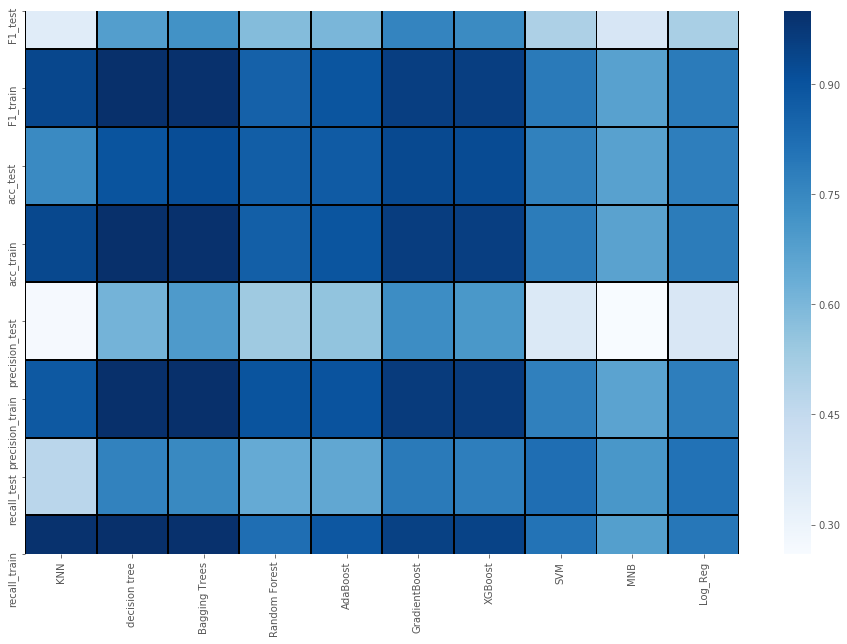

In [126]:
#looking at it visualy:
fig, ax = plt.subplots(figsize=(16,10))
# sns.heatmap(tr_res,annot=False,cmap="Blues")
sns.heatmap(tr_res,annot=False,linewidths=1,linecolor = 'black',cmap="Blues")

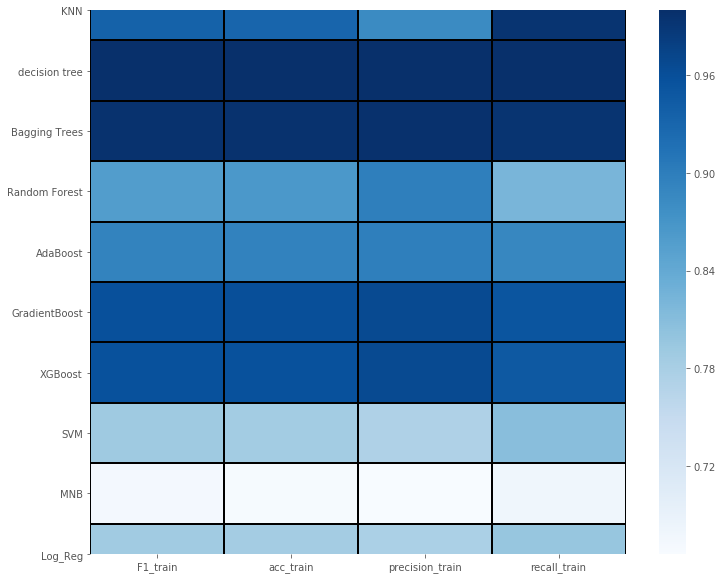

In [47]:
#looking at just the training data

fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(res[train_l],annot=False,linewidths=1,linecolor = 'black',cmap="Blues")

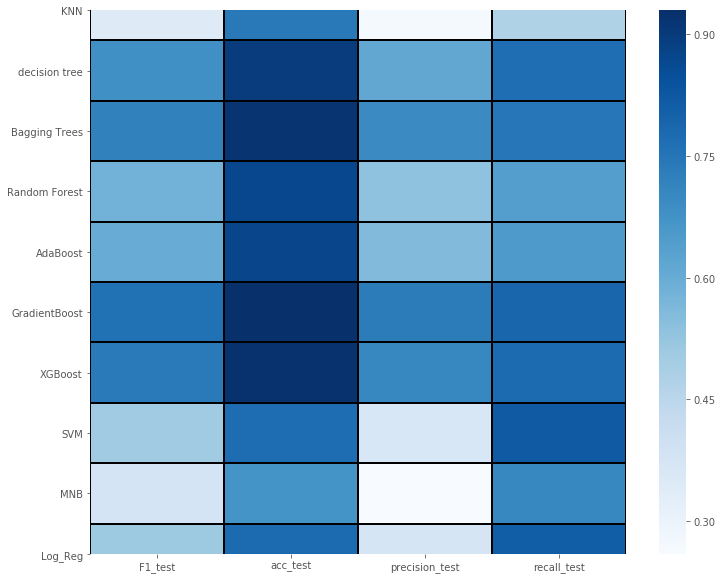

In [48]:
#looking at just the testing data

fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(res[test_l],annot=False,linewidths=1,linecolor = 'black',cmap="Blues")

## Fine-tuning GradientBoost & XGBoost  models

### Gradient Boost Tuning

In [70]:
#model
mod_gb=GradientBoostingClassifier(random_state=123)


# parameters to test
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['subsample'] = [0.5, 0.7, 1.0]
grid['max_depth'] = [3, 7, 9]
grid['verbose'] = [1]

    

#grid search
grid_search = GridSearchCV(estimator=mod_gb, 
                           param_grid=grid, 
                           scoring='accuracy',
                           n_jobs=2,)



In [71]:
# Fit the training data
grid_search.fit(X_train_smoted, y_train_smoted)

# Print the accuracy on test set
grid_search.score(X_test, y_test)

/Users/sawyershader-seave/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.2189           0.1458            1.12m
         2           1.0906           0.1133            1.01m
         3           0.9829           0.1067            1.03m
         4           0.8854           0.0856           58.15s
         5           0.8004           0.0741           56.08s
         6           0.7285           0.0612           55.38s
         7           0.6638           0.0549           56.32s
         8           0.6172           0.0443           53.88s
         9           0.5575           0.0418           52.80s
        10           0.5208           0.0325           51.37s
        20           0.2654           0.0116            1.03m
        30           0.1567           0.0061            1.07m
        40           0.0979           0.0020            1.05m
        50           0.0728           0.0003           56.87s
        60           0.0549           0.0003           52.17s
       

0.9580209895052474

In [72]:
#get best parameters
grid_search.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=9,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=123, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=1,
                           warm_start=False)

In [73]:
# tuning results
gb_mod= eval_m(GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=9,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=123, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=1,
                           warm_start=False),'GradientBoost_tuned')
#model metrics
gb_mod 

/Users/sawyershader-seave/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.2189           0.1458           48.99s
         2           1.0906           0.1133           45.12s
         3           0.9829           0.1067           48.02s
         4           0.8854           0.0856           44.74s
         5           0.8004           0.0741           42.60s
         6           0.7285           0.0612           40.32s
         7           0.6638           0.0549           40.59s
         8           0.6172           0.0443           41.96s
         9           0.5575           0.0418           41.47s
        10           0.5208           0.0325           41.74s
        20           0.2654           0.0116           48.44s
        30           0.1567           0.0061            1.08m
        40           0.0979           0.0020           57.85s
        50           0.0728           0.0003           51.91s
        60           0.0549           0.0003           46.43s
       

precision_train    1.000000
recall_train       1.000000
acc_train          1.000000
F1_train           1.000000
precision_test     0.860215
recall_test        0.842105
acc_test           0.958021
F1_test            0.851064
Name: GradientBoost_tuned, dtype: float64

In [81]:
#create dataframe to compare results
final_gb= pd.DataFrame()
final_gb

""


In [82]:
#add 'tuned' GB to dataframe
final_gb =final_gb.append(gb_mod)

In [83]:
#gradient boost model
final_gb

,F1_test,F1_train,acc_test,acc_train,precision_test,precision_train,recall_test,recall_train
GradientBoost_tuned,0.851064,1.0,0.958021,1.0,0.860215,1.0,0.842105,1.0


In [84]:
#add initial gradient boost and baseline models to dataframe
final_gb =final_gb.append(eval_m(GradientBoostingClassifier(random_state=123),'GradientBoost'))
final_gb =final_gb.append(eval_m(KNeighborsClassifier(n_neighbors=5),'BaseLine(KNN)'))



/Users/sawyershader-seave/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/sawyershader-seave/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [86]:
# transpose results
finalgb_tp=final_gb.transpose()
finalgb_tp

,GradientBoost_tuned,GradientBoost,BaseLine(KNN)
F1_test,0.851064,0.761421,0.344828
F1_train,1.000000,0.959328,0.935344
acc_test,0.958021,0.929535,0.743628
acc_train,1.000000,0.959614,0.931299
precision_test,0.860215,0.735294,0.271084
precision_train,1.000000,0.966162,0.883340
recall_test,0.842105,0.789474,0.473684
recall_train,1.000000,0.952590,0.993854


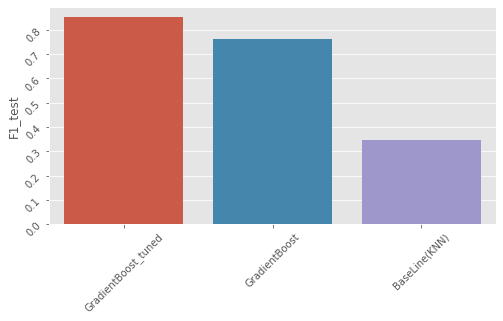

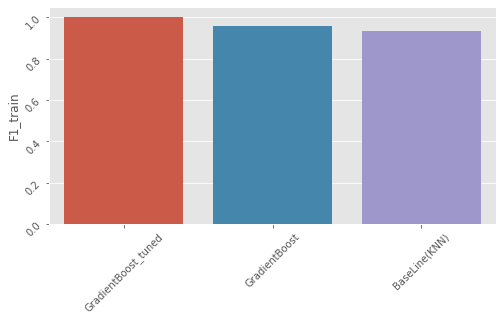

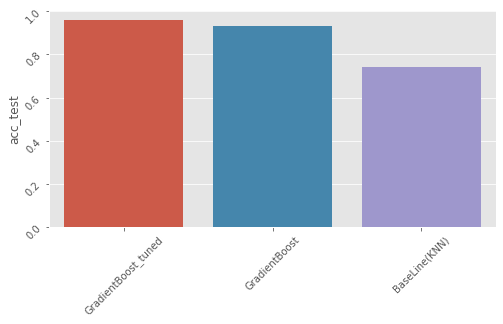

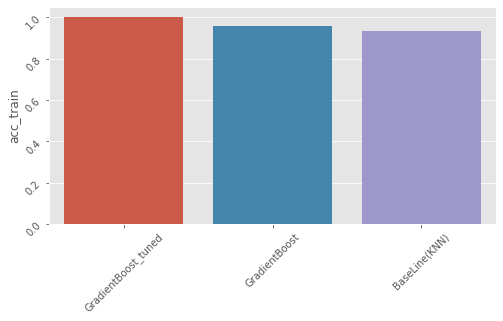

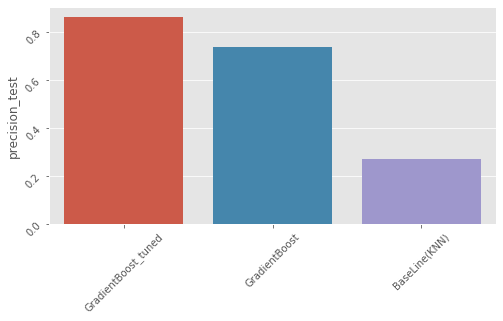

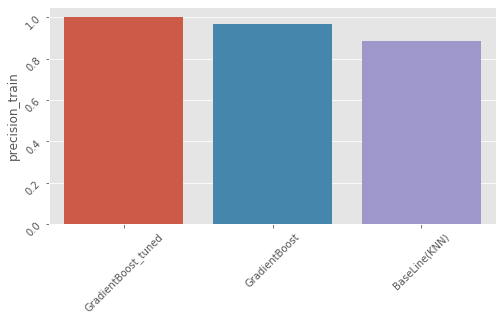

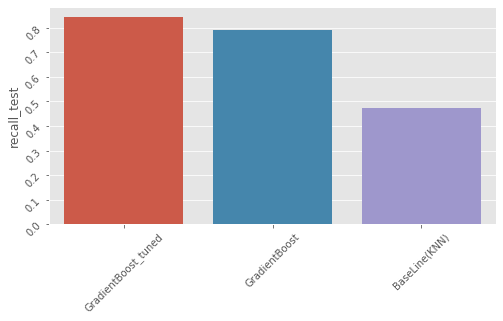

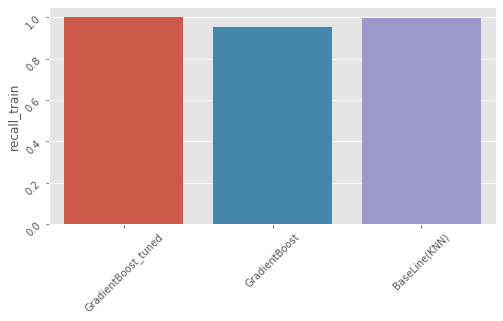

In [87]:
# graph comparable results
for i in finalgb_tp.index:
    fig, ax1 = plt.subplots(figsize=(8,4))
    sns.barplot(y=finalgb_tp.loc[i],x=finalgb_tp.columns,ax=ax1).tick_params(labelsize=10,rotation=45)


In [88]:
# get info on significance of features 
gbc=GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=9,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=123, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=1,
                           warm_start=False).fit(X_train_smoted, y_train_smoted)

gbc.feature_importances_


      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.2189           0.1458            1.17m
         2           1.0906           0.1133           59.23s
         3           0.9829           0.1067           54.35s
         4           0.8854           0.0856           48.64s
         5           0.8004           0.0741           45.62s
         6           0.7285           0.0612           45.13s
         7           0.6638           0.0549           43.18s
         8           0.6172           0.0443           41.92s
         9           0.5575           0.0418           41.71s
        10           0.5208           0.0325           40.77s
        20           0.2654           0.0116           42.11s
        30           0.1567           0.0061           49.35s
        40           0.0979           0.0020           44.47s
        50           0.0728           0.0003           40.70s
        60           0.0549           0.0003           37.56s
       

array([1.57892516e-02, 1.29018336e-01, 4.95676755e-02, 1.68518120e-02,
       2.03234871e-01, 6.63901179e-02, 1.67017874e-02, 2.96619119e-02,
       1.96609615e-02, 3.92917555e-02, 4.77043929e-02, 2.74018721e-01,
       6.29057183e-05, 1.85207463e-03, 9.73077672e-04, 6.85264010e-04,
       8.25364729e-04, 2.46403478e-03, 2.44900111e-03, 4.19604519e-04,
       6.46201942e-04, 9.27607879e-04, 7.95306365e-04, 1.68648860e-03,
       8.80581325e-04, 1.60062158e-03, 3.30307866e-03, 1.53542127e-03,
       2.71873325e-04, 8.34973108e-04, 4.16041424e-03, 1.96236060e-03,
       3.64383155e-03, 2.50030049e-03, 1.12452722e-03, 3.56958052e-04,
       3.14000588e-03, 2.37477004e-03, 2.55245988e-04, 2.01956974e-03,
       1.37123871e-03, 1.40084264e-03, 6.88691426e-03, 1.54347854e-03,
       1.07476387e-03, 1.22719944e-03, 2.52783560e-03, 4.64483375e-05,
       9.94593204e-04, 1.87109034e-03, 1.37648767e-03, 9.18092761e-04,
       2.17953130e-03, 1.10031867e-06, 5.80249283e-03, 1.41264726e-03,
      

In [89]:
# create more readable view for features
gb_features = pd.DataFrame(gbc.feature_importances_, X.columns, columns=['importance'])
gb_features = gb_features.sort_values(by=['importance'], ascending=False)
gb_features

,importance
customer service calls,0.274019
total day charge,0.203235
international plan,0.129018
total eve minutes,0.066390
voice mail plan,0.049568
...,...
state_cat_KY,0.000272
state_cat_NC,0.000255
state_cat_AL,0.000063
state_cat_OK,0.000046


In [94]:
# look at most significant features
gb_features[gb_features['importance']>0.01]

,importance
customer service calls,0.274019
total day charge,0.203235
international plan,0.129018
total eve minutes,0.066390
voice mail plan,0.049568
total intl charge,0.047704
total intl calls,0.039292
total night minutes,0.029662
total night calls,0.019661
total day calls,0.016852


customer service calls, total day charge, international plan appear to be the most important features

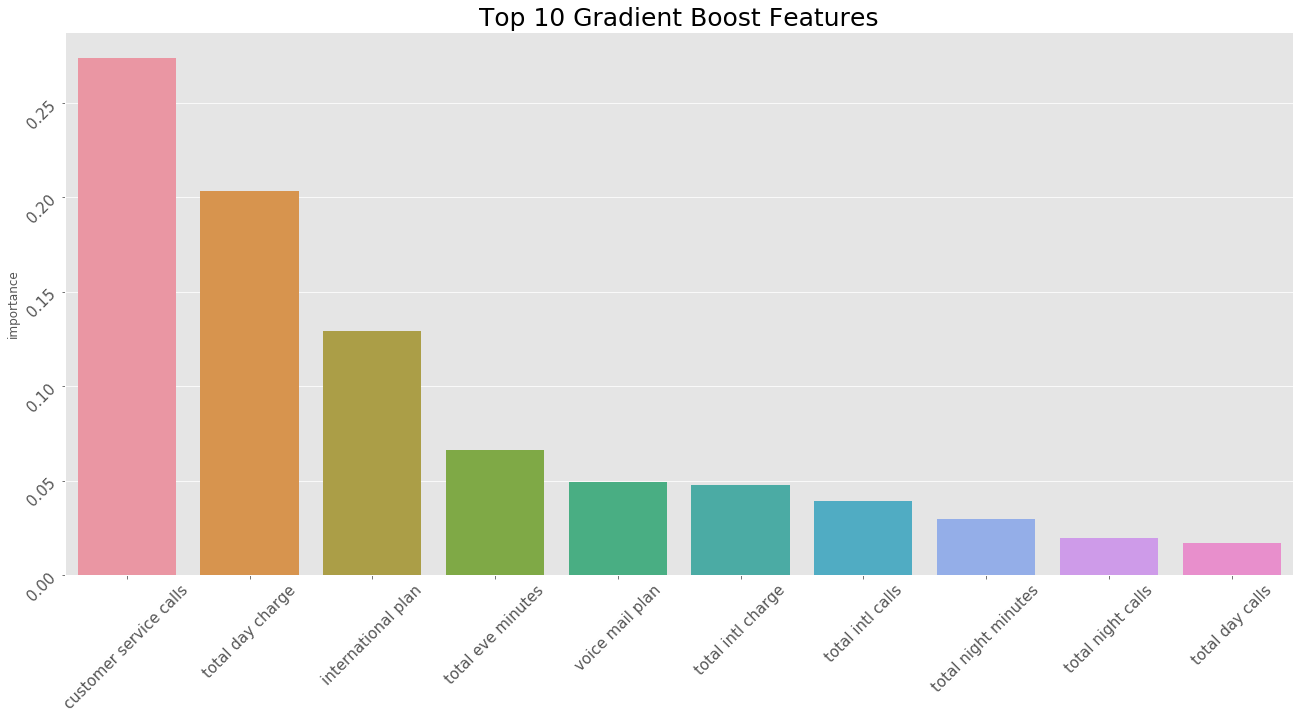

In [105]:
# graph top 10 results
fig, ax1 = plt.subplots(figsize=(22,10))
ax1.set_title('Top 10 Gradient Boost Features',size=25)
g=sns.barplot(x=gb_features.index[0:10],y=gb_features['importance'][0:10],ax=ax1).tick_params(labelsize=15,rotation=45)


------

### XGBoost Tuning

In [106]:
#model
mod_xg=xgb.XGBClassifier()


# parameters to test
parameters = {
     "eta"    : [0.01, 0.10, 0.20, 0.30 ] ,
     "max_depth"        : [ 3, 6, 9, 12],
     "min_child_weight" : [ 1, 3, 5, 7],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
     "subsample": [ 0.3,0.6,1],
    "verbose_eval" : [True]

     }


#grid search
grid_search = GridSearchCV(estimator=mod_xg, 
                           param_grid=parameters, 
                           scoring='accuracy',
                          n_jobs=2)



In [107]:
# Fit the training data
grid_search.fit(X_train_smoted, y_train_smoted)

# Print the accuracy on test set
grid_search.score(X_test, y_test)

/Users/sawyershader-seave/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.952023988005997

In [108]:
# find best parameters 
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eta=0.01, gamma=0.0,
              learning_rate=0.1, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbose_eval=True, verbosity=1)

In [109]:
# tuning results
xgb_res=eval_m(xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eta=0.01, gamma=0.0,
              learning_rate=0.1, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
,'XGBoost_tuned')
xgb_res

/Users/sawyershader-seave/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


precision_train    1.000000
recall_train       1.000000
acc_train          1.000000
F1_train           1.000000
precision_test     0.838710
recall_test        0.821053
acc_test           0.952024
F1_test            0.829787
Name: XGBoost_tuned, dtype: float64

In [110]:
#dataframe to compare results
final1= pd.DataFrame()
final1


""


In [111]:
# ad new XG boost results to dataframe
final1 =final1.append(xgb_res)

In [112]:
final1


,F1_test,F1_train,acc_test,acc_train,precision_test,precision_train,recall_test,recall_train
XGBoost_tuned,0.829787,1.0,0.952024,1.0,0.83871,1.0,0.821053,1.0


In [113]:
# add initial XG boost and baseline results to data frame
final1 = final1.append(eval_m(xgb.XGBClassifier(),'XGBoost'))
final1 = final1 .append(eval_m(KNeighborsClassifier(n_neighbors=5),'BaseLine(KNN)'))


/Users/sawyershader-seave/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [114]:
f1_tp=final1.transpose()
f1_tp

,XGBoost_tuned,XGBoost,BaseLine(KNN)
F1_test,0.829787,0.740000,0.344828
F1_train,1.000000,0.957216,0.935344
acc_test,0.952024,0.922039,0.743628
acc_train,1.000000,0.957638,0.931299
precision_test,0.838710,0.704762,0.271084
precision_train,1.000000,0.966861,0.883340
recall_test,0.821053,0.778947,0.473684
recall_train,1.000000,0.947761,0.993854


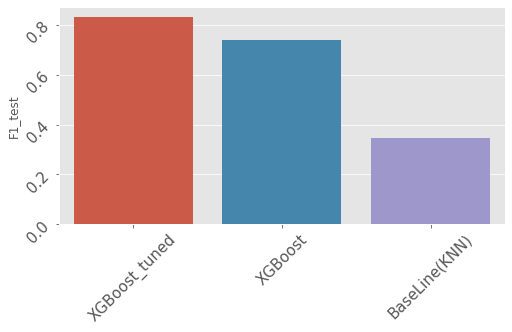

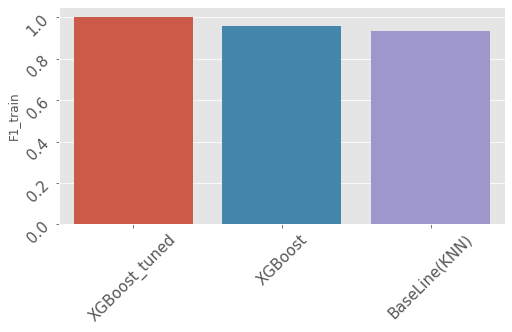

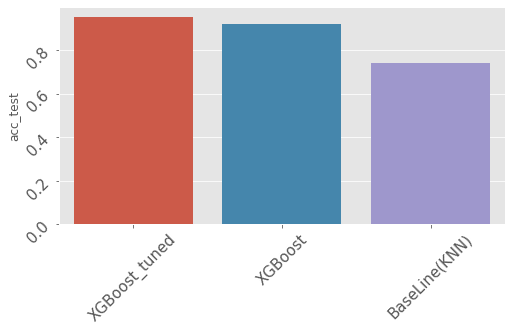

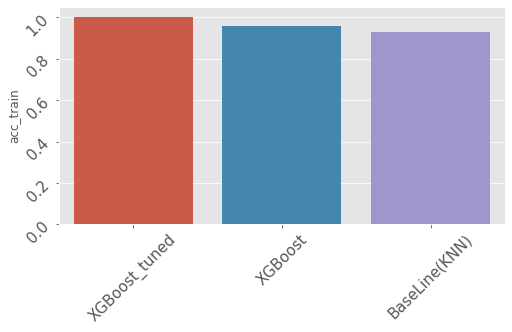

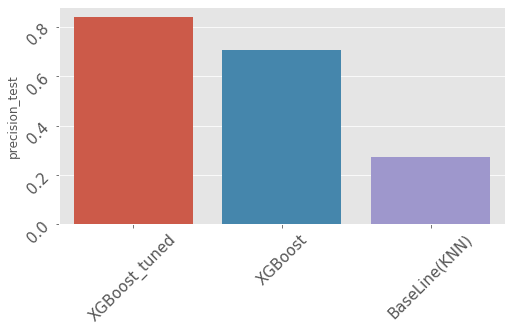

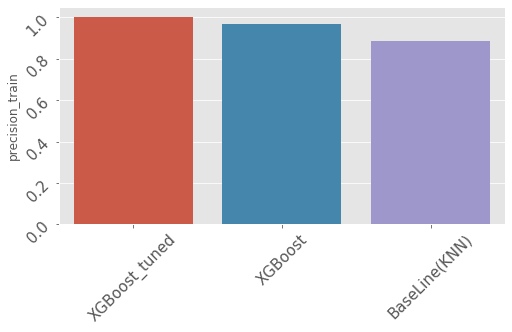

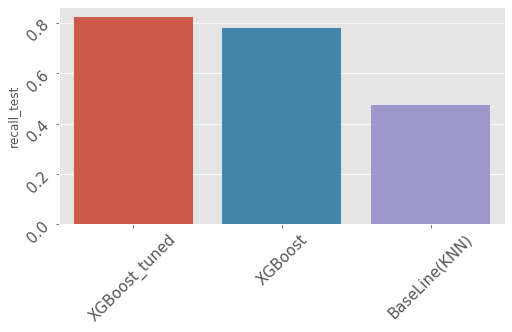

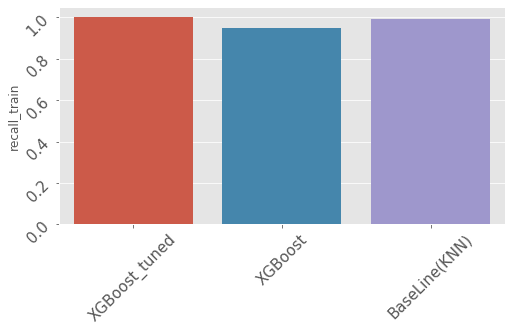

In [115]:
#graph comparable results

for i in f1_tp.index:
    fig, ax1 = plt.subplots(figsize=(8,4))
    sns.barplot(y=f1_tp.loc[i],x=f1_tp.columns,ax=ax1).tick_params(labelsize=15,rotation=45)


In [117]:
# get/show most important features

#new xgBoost model
xg_fit = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eta=0.01, gamma=0.0,
              learning_rate=0.1, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1).fit(X_train_smoted, y_train_smoted)

xg_fit.feature_importances_

#data frame to presnt and sort features
xg_features = pd.DataFrame(xg_fit.feature_importances_, X.columns, columns=['importance'])
xg_features = xg_features.sort_values(by=['importance'], ascending=False)
xg_features
xg_features[xg_features['importance']>0.01]

,importance
international plan,0.079393
voice mail plan,0.051786
state_cat_TN,0.049446
customer service calls,0.046269
total intl calls,0.037305
state_cat_SD,0.027997
state_cat_NC,0.024579
total day charge,0.022493
state_cat_GA,0.021376
state_cat_OK,0.021074


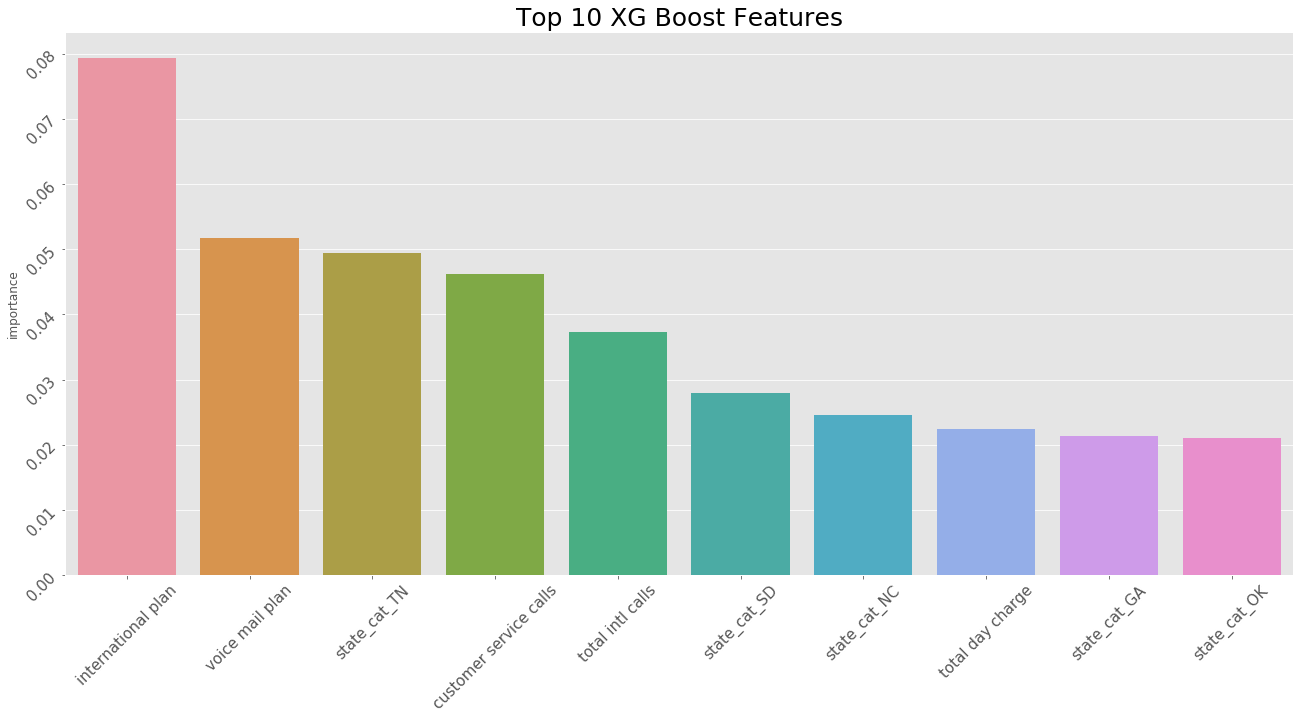

In [127]:
# graph top features
fig, ax1 = plt.subplots(figsize=(22,10))
ax1.set_title('Top 10 XG Boost Features',size=25)
g=sns.barplot(x=xg_features.index[0:10],y=xg_features['importance'][0:10],ax=ax1).tick_params(labelsize=15,rotation=45)



# Secondary Analysis

Sine the presumed goal, in analyzing churn data is to keep customers I ran a short secondary analysis looking at customer left early or later than the average customer

In [198]:
df3=df2 #create new data frame

In [199]:
df3=df3[df3['churn'] == 1] 
# only look at customers that 'churned'/left since we dont know how long current ones will stay

In [200]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483 entries, 10 to 3323
Data columns (total 65 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          483 non-null    int64  
 1   international plan      483 non-null    int64  
 2   voice mail plan         483 non-null    int64  
 3   total day calls         483 non-null    int64  
 4   total day charge        483 non-null    float64
 5   total eve minutes       483 non-null    float64
 6   total eve calls         483 non-null    int64  
 7   total night minutes     483 non-null    float64
 8   total night calls       483 non-null    int64  
 9   total intl calls        483 non-null    int64  
 10  total intl charge       483 non-null    float64
 11  customer service calls  483 non-null    int64  
 12  churn                   483 non-null    int64  
 13  state_cat_AL            483 non-null    uint8  
 14  state_cat_AR            483 non-null    

In [201]:
df3=df3.drop('churn', axis=1) # drop churn since it is now irrelevant


In [202]:
df3.head()

,account length,international plan,voice mail plan,total day calls,total day charge,total eve minutes,total eve calls,total night minutes,total night calls,total intl calls,...,state_cat_TX,state_cat_UT,state_cat_VA,state_cat_VT,state_cat_WA,state_cat_WI,state_cat_WV,state_cat_WY,areaCode_415,areaCode_510
10,65,0,0,137,21.95,228.5,83,208.8,111,6,...,0,0,0,0,0,0,0,0,1,0
15,161,0,0,67,56.59,317.8,97,160.6,128,9,...,0,0,0,0,0,0,0,0,1,0
21,77,0,0,89,10.61,169.9,121,209.6,64,6,...,0,0,0,0,0,0,0,0,0,0
33,12,0,0,118,42.43,252.4,119,280.2,90,3,...,0,0,0,0,0,0,0,0,0,0
41,135,1,1,85,29.43,203.9,107,122.2,78,15,...,0,0,0,0,0,0,0,0,0,0


In [203]:
df3['account length'].describe()

count    483.000000
mean     102.664596
std       39.467820
min        1.000000
25%       76.000000
50%      103.000000
75%      127.000000
max      225.000000
Name: account length, dtype: float64

Mean lenght of account that left is 102.66 <br> 
Median lenght of account that left is 103 <br> 103 seems like a reasonable metric for the standard account lenght   

In [204]:
#divide up account length data into above average vs not
acc_len = []
for i in df3['account length']:
    if i>103:
        acc_len.append(1)
    else:
        acc_len.append(0)

In [205]:
df3['ab_avg_length']=acc_len # create to varaible to test if accounts last longer than average


In [206]:
df3=df3.drop('account length', axis=1) # drop initial account length data (to closely connected to new variable)


In [207]:
df3.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 483 entries, 10 to 3323
Data columns (total 64 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   international plan      483 non-null    int64  
 1   voice mail plan         483 non-null    int64  
 2   total day calls         483 non-null    int64  
 3   total day charge        483 non-null    float64
 4   total eve minutes       483 non-null    float64
 5   total eve calls         483 non-null    int64  
 6   total night minutes     483 non-null    float64
 7   total night calls       483 non-null    int64  
 8   total intl calls        483 non-null    int64  
 9   total intl charge       483 non-null    float64
 10  customer service calls  483 non-null    int64  
 11  state_cat_AL            483 non-null    uint8  
 12  state_cat_AR            483 non-null    uint8  
 13  state_cat_AZ            483 non-null    uint8  
 14  state_cat_CA            483 non-null    

In [210]:
#reset index, drop 'index' column, drop random index
df4=df3.reset_index()
df4.drop(10)
df4.drop('index', axis =1)

,international plan,voice mail plan,total day calls,total day charge,total eve minutes,total eve calls,total night minutes,total night calls,total intl calls,total intl charge,...,state_cat_UT,state_cat_VA,state_cat_VT,state_cat_WA,state_cat_WI,state_cat_WV,state_cat_WY,areaCode_415,areaCode_510,ab_avg_length
0,0,0,137,21.95,228.5,83,208.8,111,6,3.43,...,0,0,0,0,0,0,0,1,0,0
1,0,0,67,56.59,317.8,97,160.6,128,9,1.46,...,0,0,0,0,0,0,0,1,0,1
2,0,0,89,10.61,169.9,121,209.6,64,6,1.54,...,0,0,0,0,0,0,0,0,0,0
3,0,0,118,42.43,252.4,119,280.2,90,3,3.19,...,0,0,0,0,0,0,0,0,0,0
4,1,1,85,29.43,203.9,107,122.2,78,15,3.94,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,0,0,113,47.60,202.2,90,156.8,103,4,2.81,...,0,0,0,0,0,0,0,1,0,0
479,1,0,114,31.64,198.6,140,206.5,80,5,3.73,...,0,0,0,0,0,0,0,0,1,0
480,1,0,101,23.80,196.4,77,120.1,133,4,2.62,...,0,0,0,0,0,0,0,0,1,1
481,0,0,105,54.59,265.5,122,180.5,72,2,3.11,...,0,0,0,0,0,0,0,0,0,0


In [240]:
df4.corr()['ab_avg_length'].sort_values(ascending=False) # check for correlations with the target


ab_avg_length          1.000000
state_cat_LA           0.093488
state_cat_NY           0.087647
state_cat_CO           0.079711
state_cat_RI           0.077344
                         ...   
areaCode_510          -0.066922
state_cat_IA          -0.077277
state_cat_KY          -0.094402
total night minutes   -0.100395
state_cat_ME          -0.111380
Name: ab_avg_length, Length: 65, dtype: float64

/Users/sawyershader-seave/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


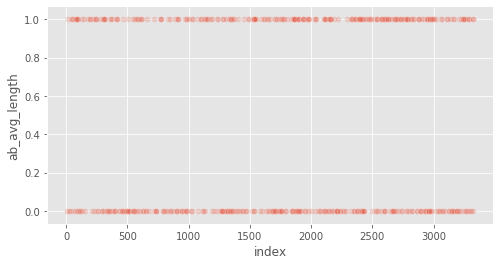

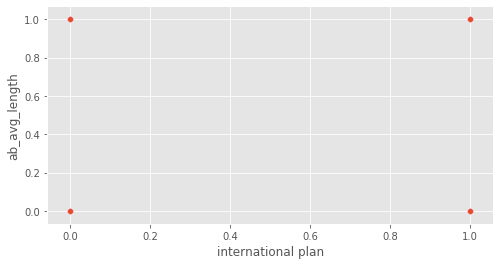

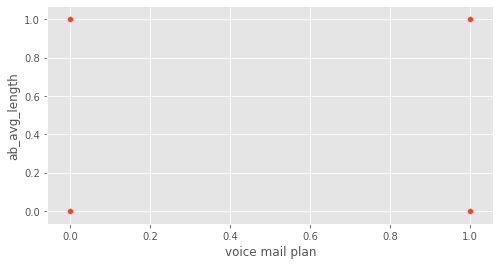

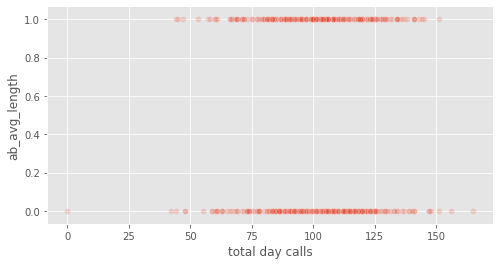

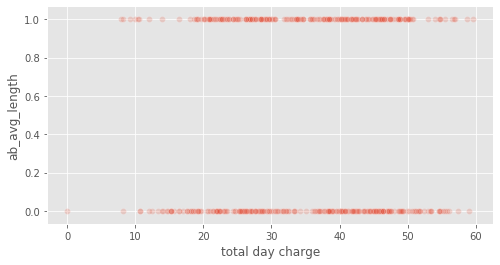

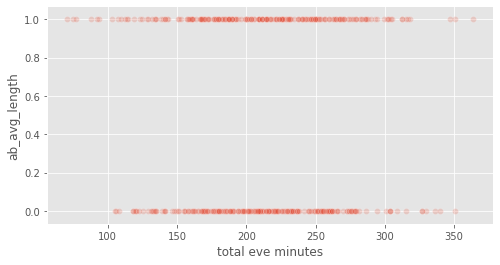

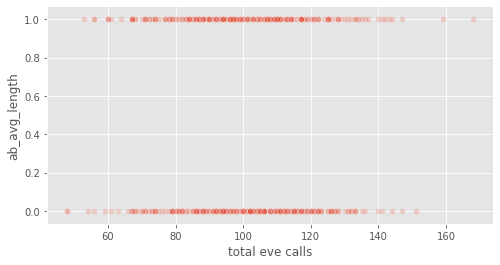

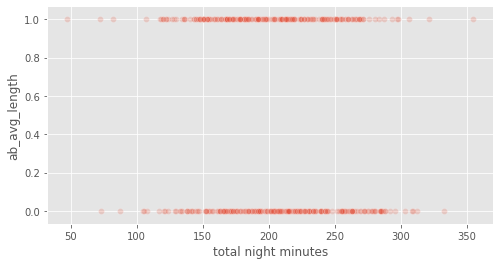

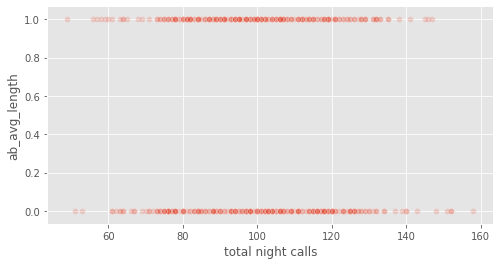

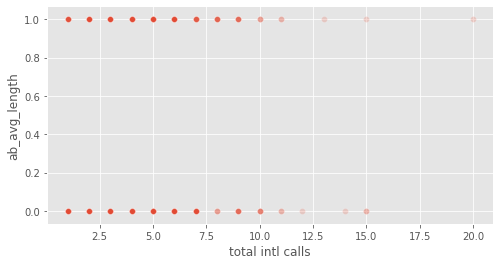

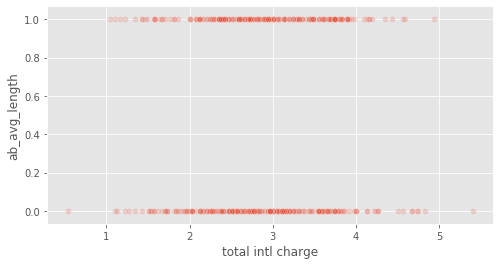

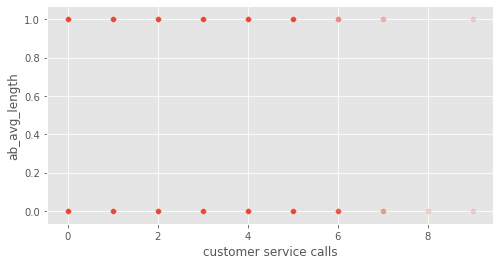

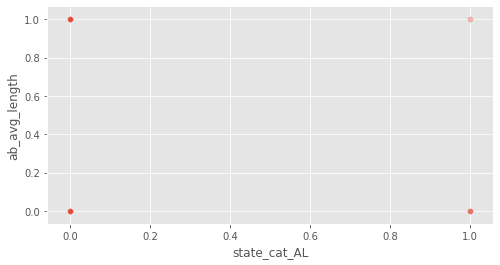

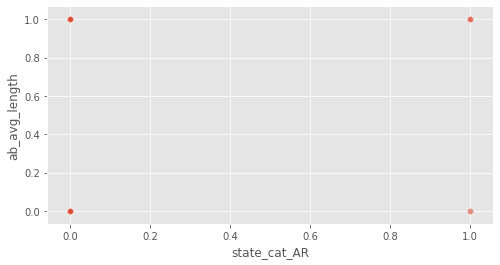

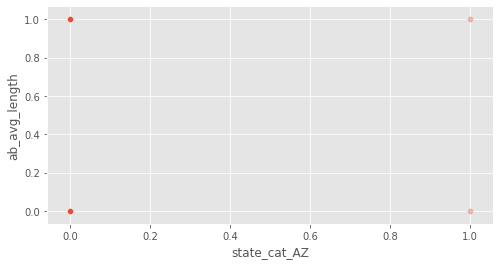

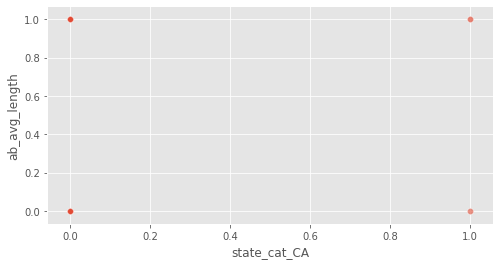

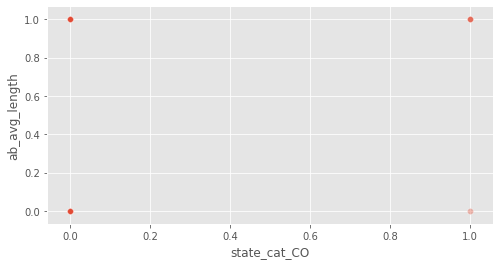

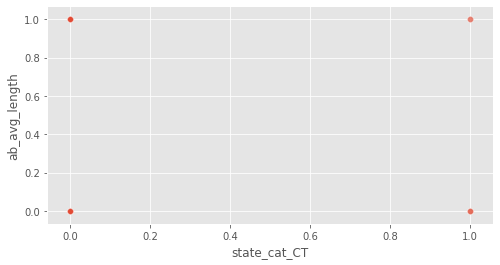

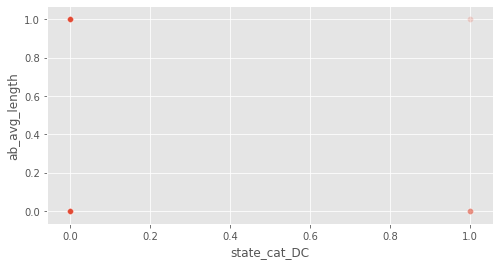

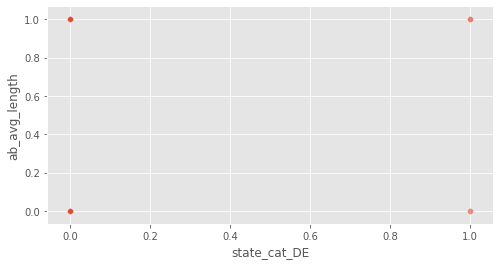

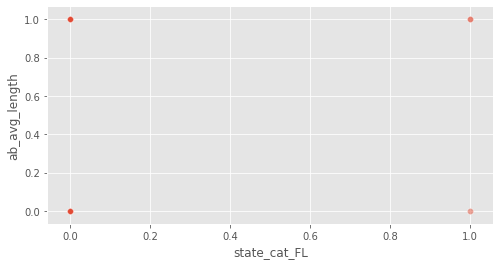

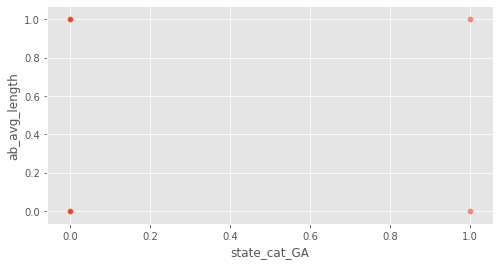

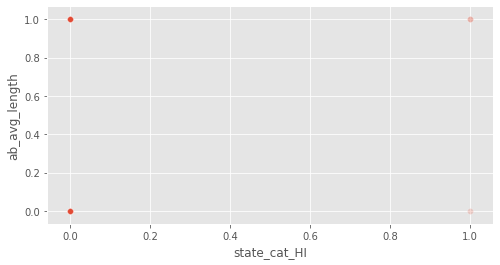

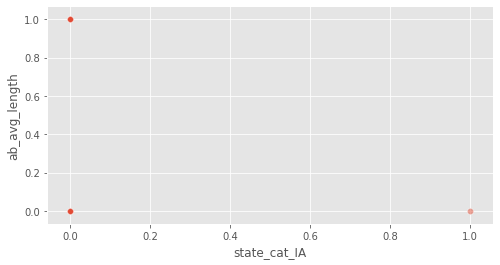

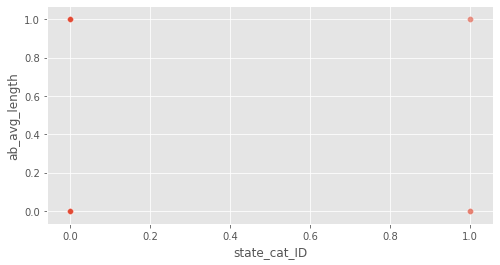

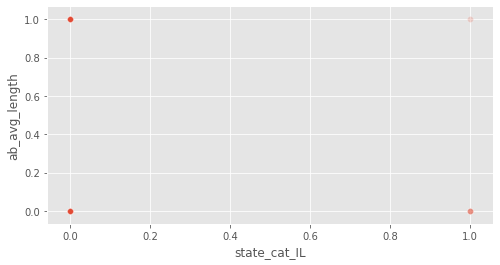

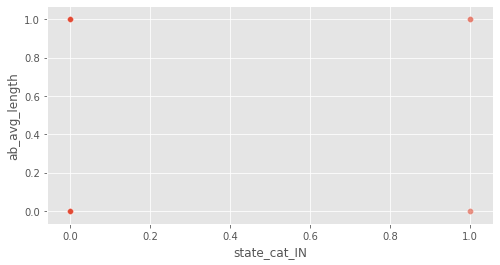

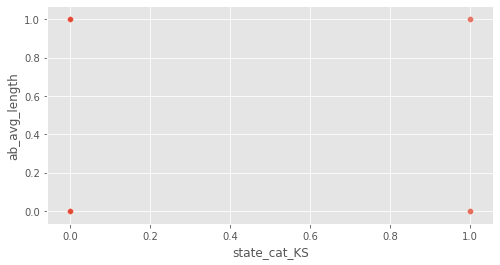

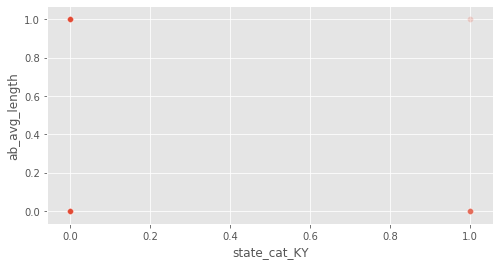

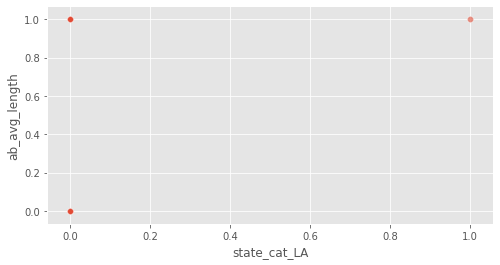

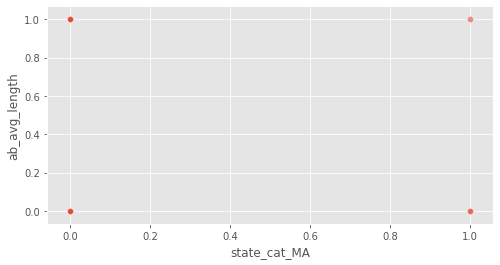

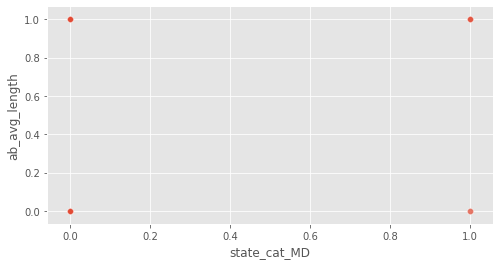

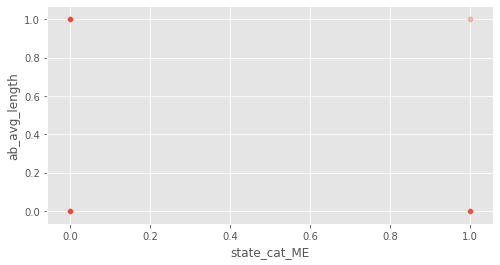

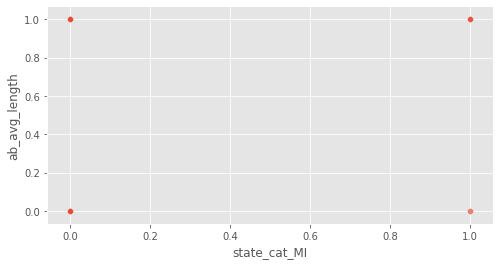

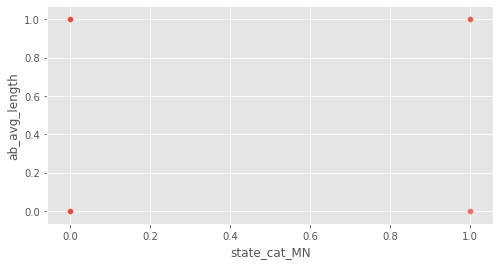

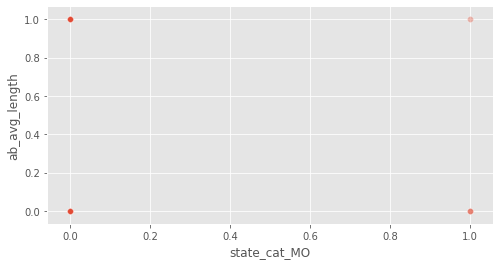

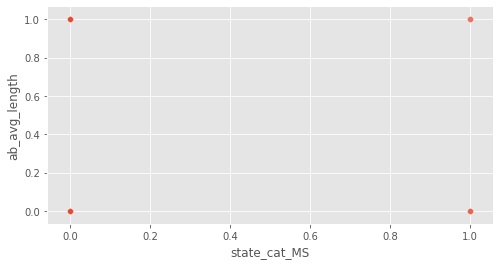

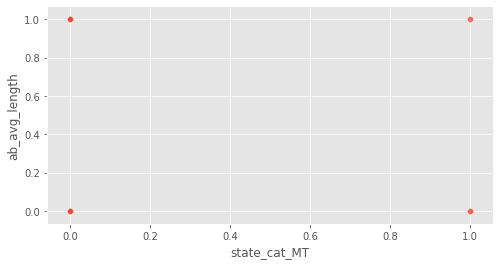

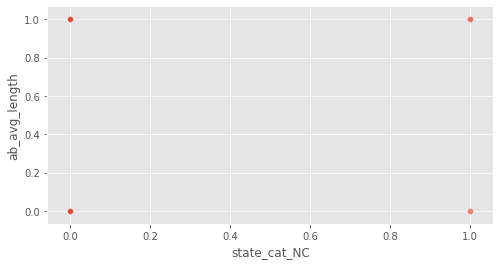

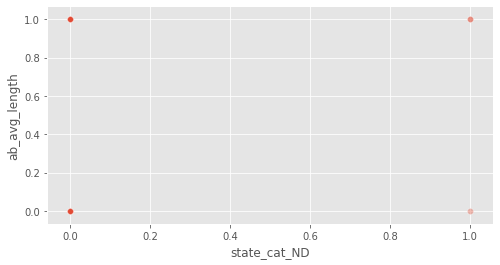

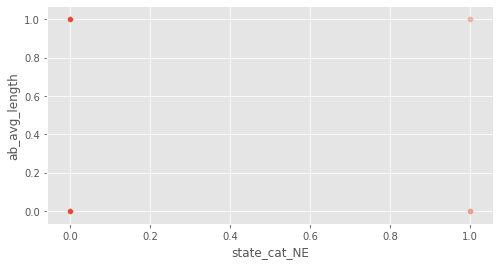

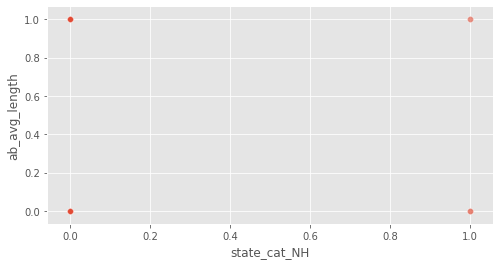

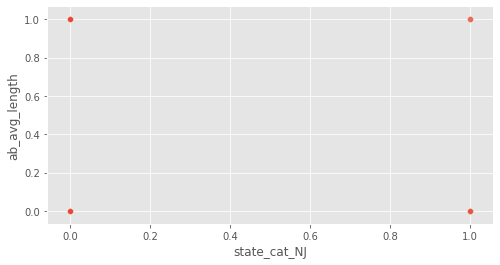

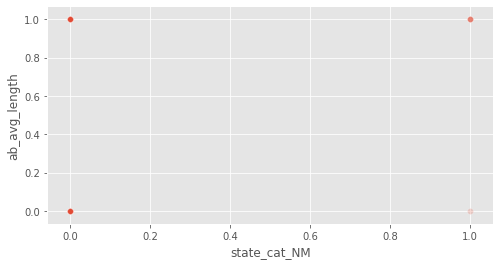

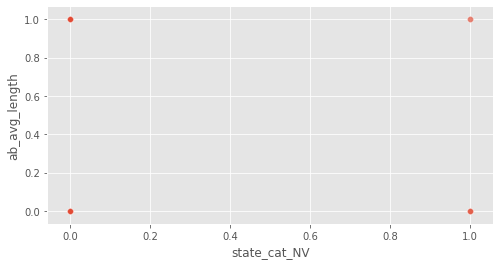

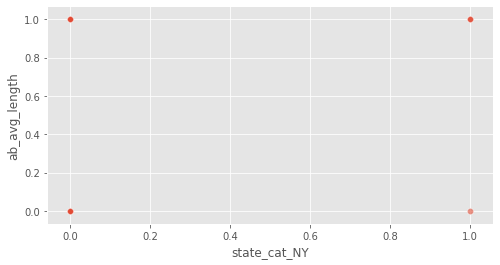

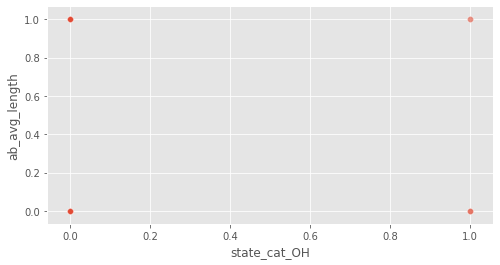

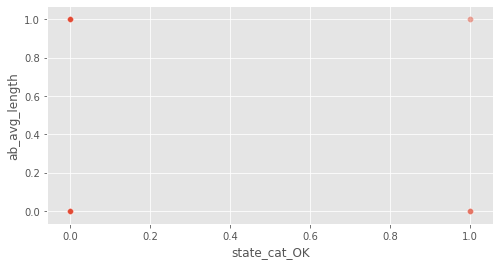

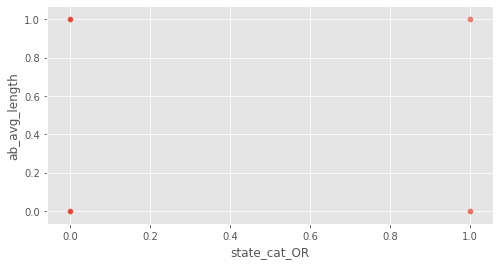

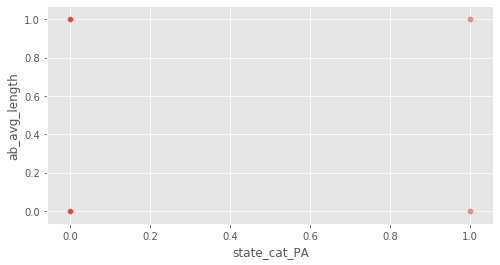

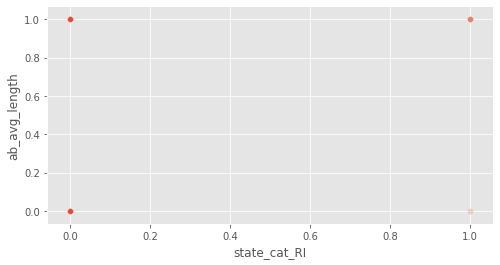

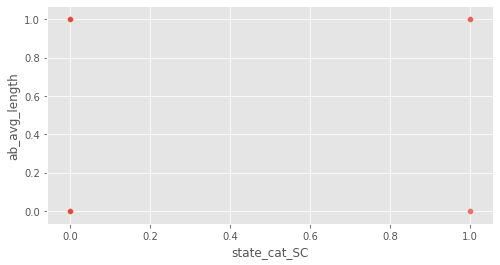

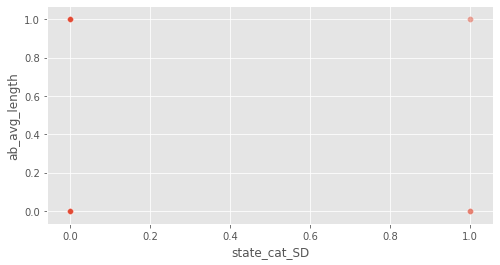

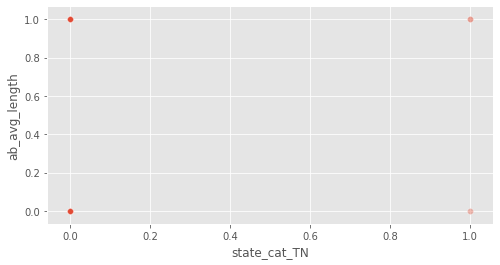

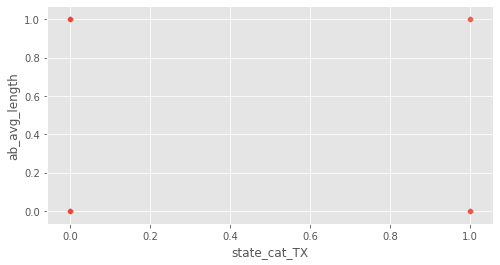

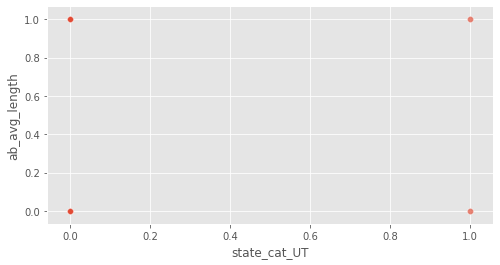

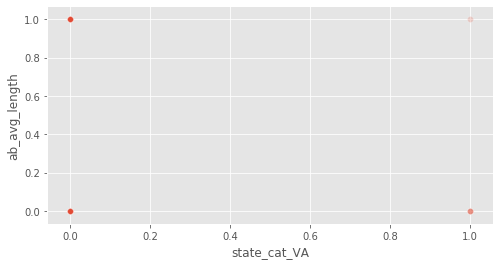

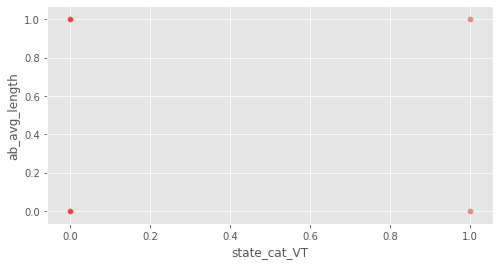

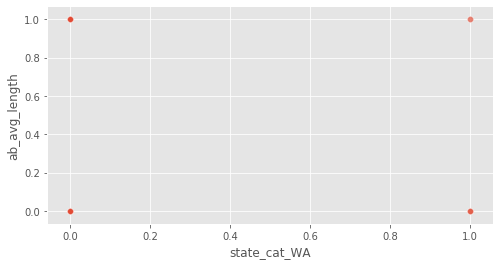

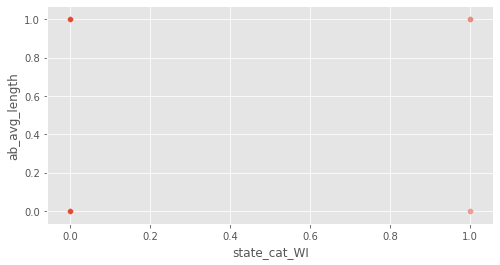

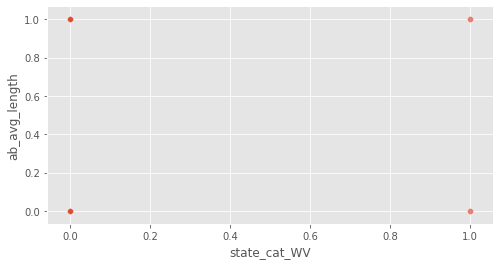

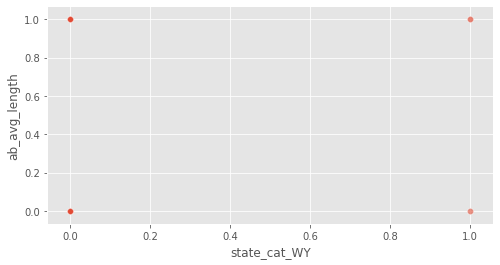

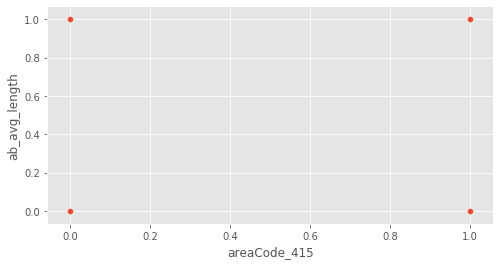

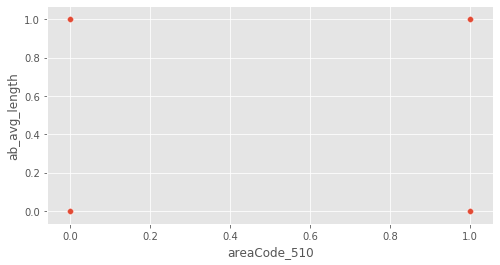

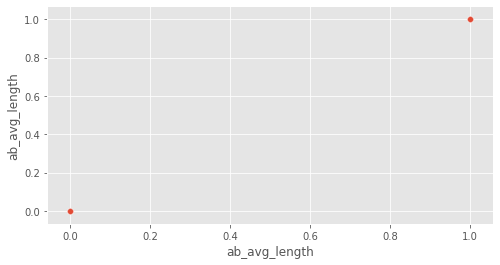

In [244]:
# visualize/check correlations
for i in df4.columns:
    fig, ax = plt.subplots(figsize=(8,4))
    sns.scatterplot(df4[i],df4['ab_avg_length'],alpha=0.2)


Almost no one in RI, NM, LA stayed below avg 
<br>
No one in IA stayed longer avg


# Conclusion

My final final 2 models predict outcomes with an accuracy of 0.95 and 0.96 hinting that they should be taken at least somewhat seriously. They also have recall scores of 0.82 and 0.85 which is important since falls negatives mean a customer left when we expected them to stay. On the other hand false positives are much less significant i.e. bottom line the customer stays. 

In interpreting the models number of customer service calls, international plan, and voicemail plan, all rank in the top 5 features both. 

Given this, the telecom company should portably invest in their customer services. Interaction plans are also slightly correlated with customers leaving and customers in Tennessee are the most significant location so they should focus domestically.  It is also worth improving and pushing their voicemail plans. 

Additionally, my secondary analysis, although limited, showed that they do best in  RI, NM, LA and worst in IA.
<br>
<br>
It is worth noting that some of these conclusions are using a limmitted sample size and should be reevaluated if implemented.

# Future work

Additional tuning could help increase the accuracy of my models and increase confidence in my conclusions. 
There was also limited data for customers that left so getting more information on customers who left.
It would also be potentially heplfull to get more information on the customers i.e. potentially more specific demographic data.